# Logisitc Regression
Logistic regression makes use of the sigmoid function which outputs a probability between 0 and 1. The sigmoid function with some weight parameter $\theta$ and some input $x^{(i)}$
$$h(x^{(i)},\theta) = \frac{1}{1 + e^{-\theta^T x^{(i)}}}$$


  ![](https://static.javatpoint.com/tutorial/machine-learning/images/logistic-regression-in-machine-learning.png)
  
  
  
here the loss function used is called **Binomial Cross_Entropy**
$$J = \frac{-1}{n}\sum_{k=0}^{n}\, {y_i.\log h + (1-y_i).\log{1 - h}} $$

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
raw_data=pd.read_csv("D:\Document\Machine_Learning\Breast_Cancer_Folder\data.csv")

In [3]:
raw_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
raw_data.info()
# Hence no null values found in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
# Making a copy of data so that no unwanted changes happen to the original data
raw_data_copy = raw_data.drop(labels=[raw_data.columns[0],raw_data.columns[32]],axis=1)

In [6]:
raw_data_copy.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [24]:
raw_data_copy.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.627417,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,1.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [95]:
raw_data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [70]:
class PrepareData:
    def __init__(self,data):
        self.df = data
        self.train = None
        self.train_labels = None
        self.test = None
        self.test_labels = None
        self.cols = []
        self.train_std = None
        self.test_std = None

    def columns_to_replace(self):
        '''
        To select columns with object data type so as to convert them into integer datatype
        '''
        for i in self.df.columns:
            if self.df[i].dtype == 'O':
                self.cols.append(i)
    def to_categorical(self):
        '''
        Replaces columns with object data type to integer data type
        '''
        self.columns_to_replace()
        for i in self.cols:
            if self.df[i].nunique() == 2:
                # M -> 1 , B - > 0
                self.df[i].replace(to_replace = self.df[i].unique() , value = [1,0] ,inplace = True)
            elif self.df[i].nunique() == 3:
                self.df[i].replace(to_replace = self.df[i].unique() , value = [0,1,-1],inplace = True)
            else:
                self.df[i].replace(to_replace = self.df[i].unique() , value = np.arange(0,self.df[i].nunique()),inplace = True)
    def train_test_split(self):
        self.to_categorical()
        number_of_rows = int(0.8*self.df.shape[0])
        self.train = self.df.iloc[:number_of_rows]
        self.train_labels = np.array(self.df["diagnosis"].iloc[:number_of_rows])
        self.train_labels = self.train_labels.reshape(self.train_labels.shape[0],1)
        self.train.drop("diagnosis",axis=1,inplace=True)
        self.test = self.df.iloc[number_of_rows:]
        self.test_labels = np.array(self.df["diagnosis"].iloc[number_of_rows:])
        self.test_labels = self.test_labels.reshape(self.test_labels.shape[0],1)
        self.test.drop("diagnosis",axis=1 , inplace=True)
        return self.train,self.train_labels,self.test,self.test_labels
    def normalise(self):
        train , train_labels,test,test_labels = self.train_test_split()
        self.train_std = np.array((train - train.min() ) /(train.max() - train.min()))
        self.test_std = np.array((test - train.min()) / (train.max() - train.min()))
        self.train_std = np.array(list(map(lambda x: np.append([1],x) , self.train_std)))
        self.test_std = np.array(list(map(lambda x: np.append([1],x) , self.test_std)))
        return self.train_std,self.train_labels,self.test_std,self.test_labels

In [71]:
data = PrepareData(raw_data_copy)

In [72]:
train,train_labels,test,test_labels = data.normalise()

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

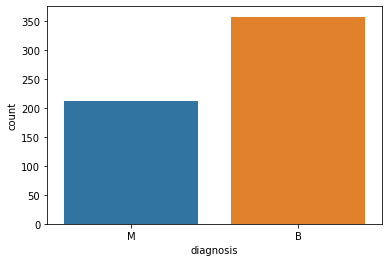

In [73]:
sns.countplot(x = "diagnosis",data=raw_data,label="count")

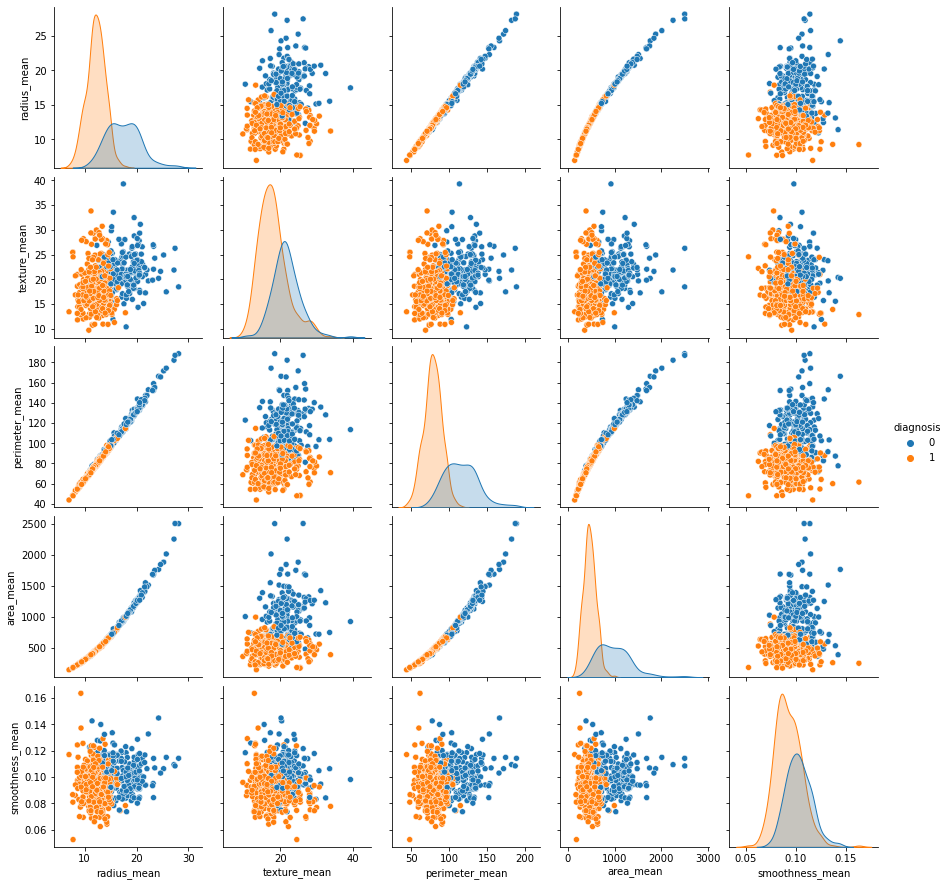

In [74]:
sns.pairplot(raw_data_copy.iloc[: ,0:6], hue = 'diagnosis')

<AxesSubplot:>

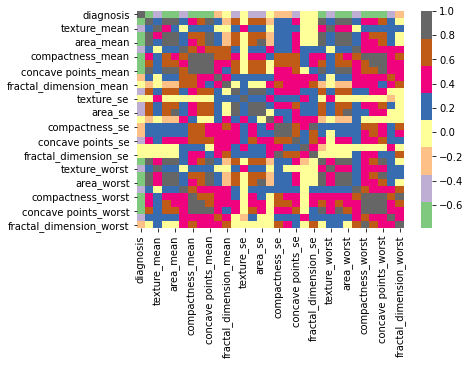

In [75]:
corr = raw_data_copy.corr()
sns.heatmap(corr,cmap='Accent')

In [131]:
class LogisticRegression:
    def __init__(self,tr_data,tr_labels,test,test_labels,alpha,num_iters,):
        self.train = tr_data
        self.train_labels = tr_labels
        self.test = test
        self.test_labels = test_labels
        self.alpha = alpha
        self.num_iters = num_iters
        self.theta = np.zeros((self.train.shape[1],1))
        self.true_positive = 0
        self.true_negative = 0
        self.false_positive = 0
        self.false_negative = 0
    def sigmoid(self,z):
        '''
        To calculate the backbone of Logistic Regression , the sigmoid function.
        Output:
        h->return the sigmoid functions output
        '''
        h = 1/(1 + np.exp(-z)) 
        return h

    def gradient_descent(self):
        '''
        Update the weights using Gradient Descent alogirthm.
        Output:
        J -> Final value of loss function
        theta -> learnt weights.
        '''
        m = self.train.shape[0]
        for i in range(0,self.num_iters):
            z = np.dot(self.train,self.theta)
            h = self.sigmoid(z)
            J = (-1./m) * (np.dot(self.train_labels.T,np.log(h)) + np.dot((1-self.train_labels).T,np.log(1 -h)))
            
            self.theta = self.theta - (self.alpha/m) * np.dot(self.train.T,h-self.train_labels)
        J = float(J)
        return J,self.theta
    
    def prediction(self,data):
        '''
        To make predictions about data.
        '''
        h = np.dot(data,self.theta)
        boolean_mask = self.sigmoid(h) > 0.5
        return boolean_mask
    def accuracy(self,data):
        '''
        Calculate the accuracy of the model
        Output:
        Accuracy -> Total number of correct answers predicted by model.
        '''
        boolean_mask = np.sum(self.test_labels == self.prediction(data) ) / self.test_labels.shape[0]
        return boolean_mask
    def classification_report(self,data):
        '''
        It is a function to calculate precision and recall 
        Output:
        Precision -> TP/(TP + FP)
        Recall -> TP/(TP+FN)
        '''
        prediction = self.prediction(data)
        for i in range(len(prediction)):
            if self.test_labels[i] == 1 and prediction[i]==1:
                self.true_positive+=1
            elif self.test_labels[i] == 1 and prediction[i] !=1:
                self.false_positive+=1
            elif self.test_labels[i] == 0 and prediction[i] == 0:
                self.true_negative +=1
            elif self.test_labels[i] == 0 and prediction[i] !=0:
                self.false_negative+=1
        precision = self.true_positive / (self.true_positive + self.false_positive)
        recall = self.true_positive /(self.true_positive + self.false_negative)
        print(f"Precision : {precision} Recall : {recall}")


In [132]:
lr = LogisticRegression(train,train_labels,test,test_labels,0.01,1000)

In [133]:
lr.gradient_descent()

(0.4990931141860863,
 array([[ 8.49962679e-01],
        [-1.87020131e-01],
        [-2.67035168e-02],
        [-2.03240118e-01],
        [-2.23695560e-01],
        [ 7.20258272e-02],
        [-1.79227308e-01],
        [-3.34043568e-01],
        [-3.92096594e-01],
        [ 9.79146899e-02],
        [ 2.21397827e-01],
        [-1.29256736e-01],
        [ 1.47521100e-01],
        [-1.19188961e-01],
        [-1.25937068e-01],
        [ 1.65321264e-01],
        [-9.50595455e-04],
        [ 2.55581717e-04],
        [ 6.15916741e-03],
        [ 1.62500221e-01],
        [ 6.40512309e-02],
        [-3.10698788e-01],
        [-5.82848899e-02],
        [-3.12517299e-01],
        [-3.22591040e-01],
        [ 3.11562846e-02],
        [-1.97181078e-01],
        [-2.65732653e-01],
        [-4.06054858e-01],
        [ 3.62199038e-03],
        [-1.57936968e-02]]))

In [134]:
lr.prediction(test)

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [

In [135]:
lr.accuracy(test)

0.956140350877193

In [136]:
lr.classification_report(test)

Precision : 0.9659090909090909 Recall : 0.9770114942528736
